# Testing for E2 - using all spindles, training with all data
fistly define the UUID of the experiment to use

In [170]:
experimentId="526685ff-765e-4c02-b4aa-23958be9563f" 

-------------------------------------------------------

In [171]:
#external libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import plotly
import plotly.subplots as sb
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import pandas as pd
import scipy.stats as sst
import scipy.fft as fft
import scipy.signal as sg
import scipy.io as sio
import pickle as pkl
import xgboost as xgb
import time
import sklearn.metrics as skm

#project library
from spinco import *

#environment variables
dotenv.load_dotenv('lab.env')

#project variables
datapath=os.environ['DATAPATH']
cognipath=datapath+"\\COGNITION"
dreamspath=datapath+"\\DREAMS"
masspath=datapath+"\\MASS"


## load mass

In [172]:
samplerate=200  #Should rethink this

In [173]:
annotations, signalsMetadata = loadMASSSpindles(masspath,forceSamplerate=samplerate)

In [174]:
#consider to include this in a function
minDuration=0.3
maxDuration=5
annotations=annotations[annotations.type=='spindle']
annotations=annotations[annotations.duration>minDuration]
annotations=annotations[annotations.duration<maxDuration]
annotations=annotations.reset_index(drop=True)

In [175]:
#check with EDA results (not needed)
print(1-len(annotations)/33458)

0.005648873214178951


In [176]:
annotations.head()

type expert subjectId labelerId   startTime  duration  samplerate  \
0  spindle     E1      0001      0001  888.327805  0.640579         200   
1  spindle     E1      0001      0001  905.758061  0.578094         200   
2  spindle     E1      0001      0001  917.731574  0.847603         200   
3  spindle     E1      0001      0001  922.078189  0.878845         200   
4  spindle     E1      0001      0001  939.055445  0.757767         200   

     stopTime  startInd  stopInd  
0  888.968384    177666   177794  
1  906.336155    181152   181267  
2  918.579177    183546   183716  
3  922.957034    184416   184591  
4  939.813212    187811   187963

In [177]:
signalsMetadata.head()

subjectId           file channel  duration  samplerate  \
0      0001  MASS_0001.pkl  C3-CLE   28956.0         200   
1      0002  MASS_0002.pkl  C3-CLE   35016.0         200   
2      0003  MASS_0003.pkl  C3-CLE   36760.0         200   
3      0004  MASS_0004.pkl  C3-CLE   28004.0         200   
4      0005  MASS_0005.pkl  C3-CLE   31244.0         200   

   isOriginalSamplerate database  
0                 False     MASS  
1                 False     MASS  
2                 False     MASS  
3                 False     MASS  
4                 False     MASS

## Load experiment results

In [178]:
experimentModels=loadPickle(os.getcwd()+"/experimentModels_ValidationperModel_Testing_E2_IoU-0.2_temp.pkl")
featureSelection=loadPickle(os.getcwd()+"/featureSelection_250bootstraping_iterations.pkl")

In [179]:
experimentModels

criteriumId criteriumName labelerIdList  \
0         0002            E2        [0002]   
1         0002            E2        [0002]   
2         0002            E2        [0002]   
3         0002            E2        [0002]   
4         0002            E2        [0002]   
5         0002            E2        [0002]   
6         0002            E2        [0002]   
7         0002            E2        [0002]   
8         0002            E2        [0002]   
9         0002            E2        [0002]   
10        0002            E2        [0002]   
11        0002            E2        [0002]   
12        0002            E2        [0002]   
13        0002            E2        [0002]   
14        0002            E2        [0002]   

                                                train                 val  \
0   [0003, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0017, 0002, 0006]   
1   [0001, 0003, 0005, 0007, 0009, 0010, 0011, 001...  [0006, 0013, 0019]   
2   [0002, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0013, 0006, 0001]   
3   [0001, 0002, 0003, 0006, 0007, 0009, 0010, 001...  [0018, 0014, 0012]   
4   [0003, 0007, 0009, 0010, 0011, 0012, 0013, 001...  [0005, 0001, 0002]   
5   [0001, 0002, 0003, 0010, 0011, 0012, 0013, 001...  [0005, 0006, 0009]   
6   [0001, 0003, 0005, 0006, 0007, 0010, 0011, 001...  [0002, 0017, 0013]   
7   [0002, 0003, 0005, 0006, 0007, 0009, 0012, 001...  [0017, 0001, 0011]   
8   [0001, 0003, 0005, 0006, 0009, 0010, 0012, 001...  [0002, 0018, 0007]   
9   [0002, 0003, 0005, 0006, 0009, 0011, 0013, 001...  [0001, 0007, 0010]   
10  [0002, 0003, 0005, 0006, 0007, 0010, 0011, 001...  [0009, 0001, 0012]   
11  [0001, 0002, 0003, 0005, 0006, 0007, 0009, 001...  [0010, 0012, 0011]   
12  [0002, 0003, 0005, 0006, 0007, 0009, 0011, 001...  [0010, 0018, 0001]   
13  [0001, 0002, 0005, 0006, 0007, 0010, 0011, 001...  [0012, 0003, 0009]   
14  [0001, 0002, 0005, 0007, 0009, 0010, 0011, 001...  [0014, 0006, 0003]   

    test                               modelId  spindleTimeRate     rawF1  \
0   0001  d79e5be1-85d3-472a-a22e-6481f5b1127b         0.056746  0.747687   
1   0002  604deeeb-1744-4dd9-97c3-bda02d1d0d27         0.061232  0.793353   
2   0003  fd829af9-4256-476c-bc47-c5390cafe144         0.063062  0.586367   
3   0005  9fc96fec-cfb6-405e-8f65-e083b96b4243         0.061716  0.711202   
4   0006  e2547620-adc4-4bd4-9296-83d8386b6430         0.058705  0.583153   
5   0007  04b442ab-22b5-48a7-a1c0-072c20a626f0         0.061530  0.669354   
6   0009  0d3a86ae-0c6c-4b2b-a26b-fad23892331c         0.055908  0.727004   
7   0010  caf69e05-ecee-4093-b879-c3f91599d0af         0.052347  0.721300   
8   0011  ed3f6f59-4859-4d08-b747-68d09e29b921         0.054834  0.764870   
9   0012  a3abdc6c-1e79-45d2-90a9-06416c8ffa59         0.053001  0.660544   
10  0013  7004596b-b1ca-4324-8901-a0778774435f         0.055095  0.718069   
11  0014  b53310fe-00ec-479d-9bfa-8f290e751d12         0.055557  0.701954   
12  0017  578d1542-3fb4-47a1-9d2b-58dd25c765ac         0.053827  0.655762   
13  0018  31ed4519-9d74-4339-ac68-efa3f02eff43         0.064234  0.716370   
14  0019  d47ade15-c1f2-4a60-a813-dfa7c35c1cdf         0.067005  0.701843   

    rawPrecision  rawRecall        f1  precision    recall   eventF1  \
0       0.705476   0.795271  0.749232   0.703940  0.800754  0.805701   
1       0.800382   0.786447  0.799625   0.796459  0.802815  0.869202   
2       0.426835   0.936323  0.590982   0.430278  0.943287  0.635165   
3       0.767876   0.662319  0.711425   0.775069  0.657439  0.782865   
4       0.729059   0.485909  0.586591   0.726703  0.491775  0.653790   
5       0.551477   0.851323  0.666910   0.544710  0.859794  0.707840   
6       0.845669   0.637543  0.734515   0.846289  0.648822  0.822301   
7       0.695314   0.749304  0.725200   0.693894  0.759465  0.793499   
8       0.760556   0.769233  0.767539   0.754137  0.781425  0.836902   
9       0.577556   0.771383  0.664405   0.574293  0.788059  0.722620   
10      

In [180]:
#we show the difference in class inbalance for the annotation criteria considered
experimentModels[['criteriumName','spindleTimeRate']].groupby('criteriumName').describe()

spindleTimeRate                                                  \
                        count     mean      std       min       25%       50%   
criteriumName                                                                   
E2                       15.0  0.05832  0.00452  0.052347  0.054965  0.056746   

                                   
                    75%       max  
criteriumName                      
E2             0.061623  0.067005

In [181]:
featureSelection

window   characteristic   bandName  Times_selected
0       2       sigmaIndex  broadband          1000.0
1       2    hjortActivity      sigma          1000.0
2     1.5       sigmaIndex  broadband          1000.0
3       1    hjortActivity      sigma          1000.0
4       1       sigmaIndex  broadband          1000.0
5       2    hjortActivity      beta1          1000.0
6       2    hjortActivity      beta2          1000.0
7     1.5    hjortActivity      sigma           999.0
8       2    hjortMobility      beta1           994.0
9       2    hjortActivity     delta2           986.0
10      2    hjortActivity  broadband           985.0
11      2    hjortMobility      sigma           975.0
12      2    hjortActivity      alpha           971.0
13    1.5    hjortActivity      beta2           918.0
14    0.5       sigmaIndex  broadband           899.0
15      2    hjortMobility      beta2           897.0
16      2    hjortMobility      alpha           893.0
17      2    hjortMobility     delta1           838.0
18    1.5    hjortMobility      beta1           824.0
19    1.5    hjortActivity      beta1           725.0
20      2        petrosian  broadband           715.0
21      1    hjortActivity  broadband           680.0
22      2    hjortActivity      theta           652.0
23    0.5    hjortActivity      sigma           650.0
24      2    hjortMobility      theta           597.0
25    0.5    hjortActivity      alpha           547.0
26    0.5    hjortActivity     delta2           486.0
27      1    hjortActivity      beta1           466.0
28      1    hjortActivity      alpha           389.0
29    1.5    hjortActivity      alpha           383.0
30      2    hjortMobility     delta2           356.0
31      2    hjortActivity     delta1           354.0
32      1    hjortActivity      theta           351.0
33    0.5  hjortComplexity  broadband           335.0
34    1.5    hjortMobility      sigma           275.0
35      1    hjortMobility      beta2           260.0

## Hyperparameter definition
this should come from a previous evaluation notebook

In [182]:
hyperClose=0.1
hyperDuration=0.3
maxDuration=5

## Testing with E2 criterium
we test the optimal points for the prediction threshold and number of boost iterations in the different validation groups

In [183]:
experimentModels=experimentModels[experimentModels.criteriumName=='E2'].reset_index(drop=True)
experimentModels

criteriumId criteriumName labelerIdList  \
0         0002            E2        [0002]   
1         0002            E2        [0002]   
2         0002            E2        [0002]   
3         0002            E2        [0002]   
4         0002            E2        [0002]   
5         0002            E2        [0002]   
6         0002            E2        [0002]   
7         0002            E2        [0002]   
8         0002            E2        [0002]   
9         0002            E2        [0002]   
10        0002            E2        [0002]   
11        0002            E2        [0002]   
12        0002            E2        [0002]   
13        0002            E2        [0002]   
14        0002            E2        [0002]   

                                                train                 val  \
0   [0003, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0017, 0002, 0006]   
1   [0001, 0003, 0005, 0007, 0009, 0010, 0011, 001...  [0006, 0013, 0019]   
2   [0002, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0013, 0006, 0001]   
3   [0001, 0002, 0003, 0006, 0007, 0009, 0010, 001...  [0018, 0014, 0012]   
4   [0003, 0007, 0009, 0010, 0011, 0012, 0013, 001...  [0005, 0001, 0002]   
5   [0001, 0002, 0003, 0010, 0011, 0012, 0013, 001...  [0005, 0006, 0009]   
6   [0001, 0003, 0005, 0006, 0007, 0010, 0011, 001...  [0002, 0017, 0013]   
7   [0002, 0003, 0005, 0006, 0007, 0009, 0012, 001...  [0017, 0001, 0011]   
8   [0001, 0003, 0005, 0006, 0009, 0010, 0012, 001...  [0002, 0018, 0007]   
9   [0002, 0003, 0005, 0006, 0009, 0011, 0013, 001...  [0001, 0007, 0010]   
10  [0002, 0003, 0005, 0006, 0007, 0010, 0011, 001...  [0009, 0001, 0012]   
11  [0001, 0002, 0003, 0005, 0006, 0007, 0009, 001...  [0010, 0012, 0011]   
12  [0002, 0003, 0005, 0006, 0007, 0009, 0011, 001...  [0010, 0018, 0001]   
13  [0001, 0002, 0005, 0006, 0007, 0010, 0011, 001...  [0012, 0003, 0009]   
14  [0001, 0002, 0005, 0007, 0009, 0010, 0011, 001...  [0014, 0006, 0003]   

    test                               modelId  spindleTimeRate     rawF1  \
0   0001  d79e5be1-85d3-472a-a22e-6481f5b1127b         0.056746  0.747687   
1   0002  604deeeb-1744-4dd9-97c3-bda02d1d0d27         0.061232  0.793353   
2   0003  fd829af9-4256-476c-bc47-c5390cafe144         0.063062  0.586367   
3   0005  9fc96fec-cfb6-405e-8f65-e083b96b4243         0.061716  0.711202   
4   0006  e2547620-adc4-4bd4-9296-83d8386b6430         0.058705  0.583153   
5   0007  04b442ab-22b5-48a7-a1c0-072c20a626f0         0.061530  0.669354   
6   0009  0d3a86ae-0c6c-4b2b-a26b-fad23892331c         0.055908  0.727004   
7   0010  caf69e05-ecee-4093-b879-c3f91599d0af         0.052347  0.721300   
8   0011  ed3f6f59-4859-4d08-b747-68d09e29b921         0.054834  0.764870   
9   0012  a3abdc6c-1e79-45d2-90a9-06416c8ffa59         0.053001  0.660544   
10  0013  7004596b-b1ca-4324-8901-a0778774435f         0.055095  0.718069   
11  0014  b53310fe-00ec-479d-9bfa-8f290e751d12         0.055557  0.701954   
12  0017  578d1542-3fb4-47a1-9d2b-58dd25c765ac         0.053827  0.655762   
13  0018  31ed4519-9d74-4339-ac68-efa3f02eff43         0.064234  0.716370   
14  0019  d47ade15-c1f2-4a60-a813-dfa7c35c1cdf         0.067005  0.701843   

    rawPrecision  rawRecall        f1  precision    recall   eventF1  \
0       0.705476   0.795271  0.749232   0.703940  0.800754  0.805701   
1       0.800382   0.786447  0.799625   0.796459  0.802815  0.869202   
2       0.426835   0.936323  0.590982   0.430278  0.943287  0.635165   
3       0.767876   0.662319  0.711425   0.775069  0.657439  0.782865   
4       0.729059   0.485909  0.586591   0.726703  0.491775  0.653790   
5       0.551477   0.851323  0.666910   0.544710  0.859794  0.707840   
6       0.845669   0.637543  0.734515   0.846289  0.648822  0.822301   
7       0.695314   0.749304  0.725200   0.693894  0.759465  0.793499   
8       0.760556   0.769233  0.767539   0.754137  0.781425  0.836902   
9       0.577556   0.771383  0.664405   0.574293  0.788059  0.722620   
10      

In [184]:
allTablesOut=pd.DataFrame({})
allDetections=[]
allAnnotations=[]

for ind,row in experimentModels.iterrows():
    print('*************************')
    print(str(ind+1)+' of '+str(len(experimentModels)) )
    #load model
    model=loadBooster(row.modelId,experimentId,datapath)

    testSubjectId=row.test
    #Define annotations criterium
    usedAnnotations=annotations[annotations.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
    #Load features and labels
    testFeatures=loadFeatureMatrix([testSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
    testLabels=loadLabelsVector([testSubjectId],usedAnnotations,signalsMetadata,samplerate)

    #Predict
    hyperThres=row.Binarization_Threshold
    hyperDepth=int(row.Boosting_Iterations)
    testDMatrix=xgb.DMatrix(data=testFeatures)
    probabilities=model.predict(testDMatrix,iteration_range=(0,hyperDepth))
    rawLabels=probabilities>=hyperThres
    
    #Process
    processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)
    
    #By-event tables
    processedAnnotations=labelVectorToAnnotations(processedLabels,samplerate)
    processedAnnotations=processedAnnotations[processedAnnotations.duration<maxDuration].reset_index(drop=True)
    gtAnnotations=labelVectorToAnnotations(testLabels,samplerate)   #<- or just filter the annotations
    tableOut,tableGT=getMetricTables(gtAnnotations,processedAnnotations, thresIoU=0.2)
    
    #Process tables
    gtAnnotations['durationGT']=gtAnnotations['duration']
    tableOut=pd.merge(tableOut,gtAnnotations["durationGT"],"left",left_on="indexGT",right_index=True)
    processedAnnotations['durationOut']=processedAnnotations['duration']
    tableOut=pd.merge(tableOut,processedAnnotations["durationOut"],"left",left_on="indexOut",right_index=True)

    tableOut['subjectId']=row.test

    allTablesOut=pd.concat((allTablesOut,tableOut))
    allDetections.append(processedAnnotations)
    allAnnotations.append(gtAnnotations)


*************************
1 of 15
*************************
2 of 15
*************************
3 of 15
*************************
4 of 15
*************************
5 of 15
*************************
6 of 15
*************************
7 of 15
*************************
8 of 15
*************************
9 of 15
*************************
10 of 15
*************************
11 of 15
*************************
12 of 15
*************************
13 of 15
*************************
14 of 15
*************************
15 of 15


In [185]:
#allTablesOut=allTablesOut[allTablesOut.durationOut.notna()]

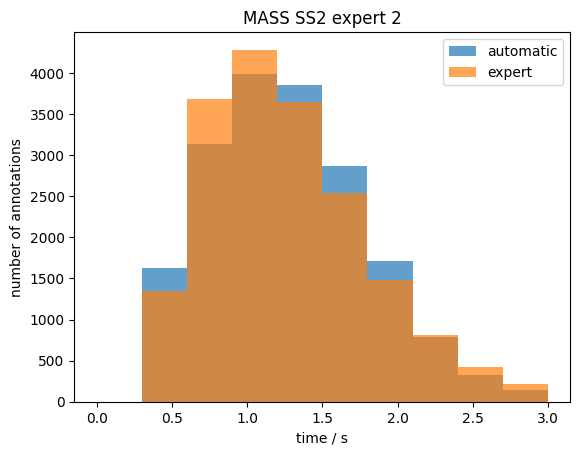

In [186]:
plt.hist(allTablesOut[allTablesOut.tp].durationOut,range=[0,3],alpha=0.7,label='automatic')
plt.hist(allTablesOut[allTablesOut.tp].durationGT,range=[0,3],alpha=0.7,label='expert')
plt.legend()
plt.xlabel("time / s")
plt.ylabel("number of annotations")
plt.title("MASS SS2 expert 2")
plt.show()

In [187]:
px.scatter(allTablesOut[allTablesOut.tp],x="durationGT",y="durationOut",trendline="lowess")

In [188]:
result=sst.linregress(allTablesOut[allTablesOut.tp].durationGT,allTablesOut[allTablesOut.tp].durationOut)

In [189]:
result

LinregressResult(slope=0.5811383087128605, intercept=0.5426935934030879, rvalue=0.5816554881958585, pvalue=0.0, stderr=0.005961176898067658, intercept_stderr=0.008341615786412206)

In [190]:
result.rvalue**2

0.33832310694836254

Text(0.5, 1.0, 'MASS SS2 expert 2')

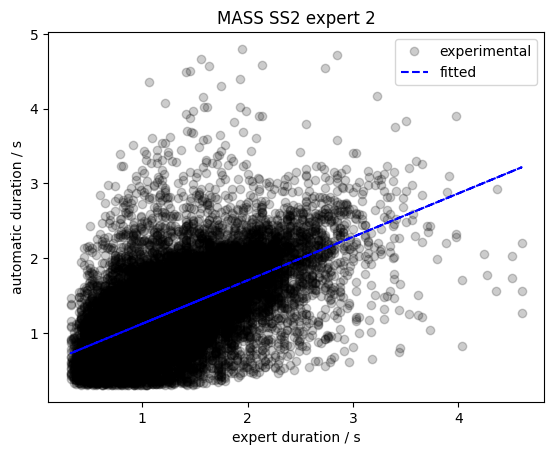

In [191]:
plt.plot(allTablesOut[allTablesOut.tp].durationGT,allTablesOut[allTablesOut.tp].durationOut,linestyle='',marker='o',color='black',alpha=0.2,label='experimental')
plt.plot(allTablesOut[allTablesOut.tp].durationGT, result.intercept + result.slope*np.array(allTablesOut[allTablesOut.tp].durationGT), 'b', label='fitted',linestyle='--')
plt.legend()
plt.xlabel("expert duration / s")
plt.ylabel("automatic duration / s")
plt.title("MASS SS2 expert 2")



In [192]:
detectionDuration = list(map(lambda x: np.mean(x['duration']), allDetections))
annotationDuration = list(map(lambda x: np.mean(x['duration']), allAnnotations))
res = sst.linregress(annotationDuration, detectionDuration)
print(res)

print(np.mean(np.array(detectionDuration) - np.array(annotationDuration)))

LinregressResult(slope=0.6358405089095153, intercept=0.37725174348333923, rvalue=0.7940440497185477, pvalue=0.00040785654788743025, stderr=0.13500058305389206, intercept_stderr=0.1620567761157433)
-0.055270289258828056


### Correlation of number of detections

In [193]:
detectionNumber=list(map(lambda x: len(x),allDetections))
annotationNumber=list(map(lambda x: len(x),allAnnotations))

In [194]:
res=sst.linregress(annotationNumber,detectionNumber)
res

LinregressResult(slope=0.9800599321166483, intercept=283.1333689679914, rvalue=0.8207862055402637, pvalue=0.00017694487662303445, stderr=0.18917602859831842, intercept_stderr=291.8010162905315)

In [195]:
res.pvalue

0.00017694487662303445

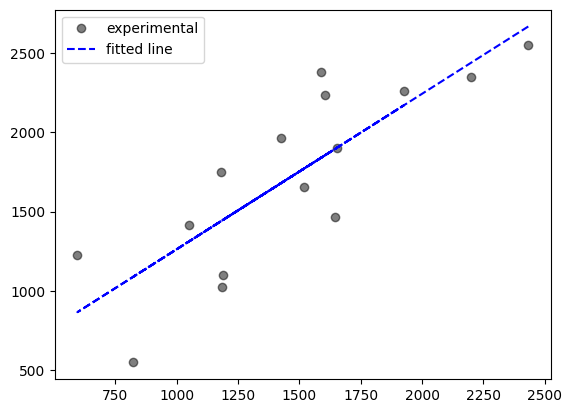

In [196]:
plt.plot(annotationNumber,detectionNumber,linestyle='',marker='o',color='black',alpha=0.5,label='experimental')
plt.plot(annotationNumber, res.intercept + res.slope*np.array(annotationNumber), 'b', linestyle='--', label='fitted line')
plt.legend()
plt.show()


### Correlations of density of spindles

In [197]:
signalsMetadata.head()

subjectId           file channel  duration  samplerate  \
0      0001  MASS_0001.pkl  C3-CLE   28956.0         200   
1      0002  MASS_0002.pkl  C3-CLE   35016.0         200   
2      0003  MASS_0003.pkl  C3-CLE   36760.0         200   
3      0004  MASS_0004.pkl  C3-CLE   28004.0         200   
4      0005  MASS_0005.pkl  C3-CLE   31244.0         200   

   isOriginalSamplerate database  
0                 False     MASS  
1                 False     MASS  
2                 False     MASS  
3                 False     MASS  
4                 False     MASS

In [198]:
durations=signalsMetadata.duration

In [199]:
detectionDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allDetections,durations)))
annotationDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allAnnotations,durations)))

In [200]:
res=sst.linregress(annotationDensity,detectionDensity)
print(res)

print(np.mean(np.array(detectionDensity)-np.array(annotationDensity)))

LinregressResult(slope=1.0534971669243063, intercept=21.837197212112557, rvalue=0.8504186938524034, pvalue=5.8941821374577176e-05, stderr=0.18076009538723997, intercept_stderr=34.224619818700546)
31.429975592359543


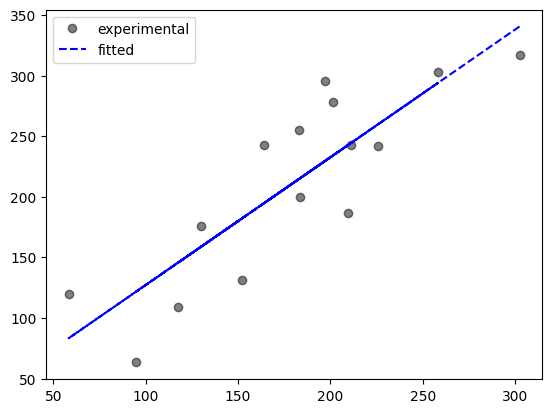

In [201]:
plt.plot(annotationDensity,detectionDensity,linestyle='',marker='o',color='black',alpha=0.5,label='experimental')
plt.plot(annotationDensity, res.intercept + res.slope*np.array(annotationDensity), 'b', linestyle='--', label='fitted')
plt.legend()
plt.show()


## Restrict to only N2 stage

In [202]:
experimentModels=loadPickle(os.getcwd()+"/experimentModelsTest_ValidationperModel_Testing_N2_E2_IoU-0.2_temp.pkl")
experimentModels=experimentModels[experimentModels.criteriumName=='E2'].reset_index(drop=True)

experimentModels_N2=experimentModels.copy()
experimentModels_N2.head()

criteriumId criteriumName labelerIdList  \
0        0002            E2        [0002]   
1        0002            E2        [0002]   
2        0002            E2        [0002]   
3        0002            E2        [0002]   
4        0002            E2        [0002]   

                                               train                 val  \
0  [0003, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0017, 0002, 0006]   
1  [0001, 0003, 0005, 0007, 0009, 0010, 0011, 001...  [0006, 0013, 0019]   
2  [0002, 0005, 0007, 0009, 0010, 0011, 0012, 001...  [0013, 0006, 0001]   
3  [0001, 0002, 0003, 0006, 0007, 0009, 0010, 001...  [0018, 0014, 0012]   
4  [0003, 0007, 0009, 0010, 0011, 0012, 0013, 001...  [0005, 0001, 0002]   

   test                               modelId  spindleTimeRate     rawF1  \
0  0001  d79e5be1-85d3-472a-a22e-6481f5b1127b         0.056746  0.799741   
1  0002  604deeeb-1744-4dd9-97c3-bda02d1d0d27         0.061232  0.789626   
2  0003  fd829af9-4256-476c-bc47-c5390cafe144         0.063062  0.688000   
3  0005  9fc96fec-cfb6-405e-8f65-e083b96b4243         0.061716  0.724810   
4  0006  e2547620-adc4-4bd4-9296-83d8386b6430         0.058705  0.604715   

   rawPrecision  rawRecall        f1  precision    recall   eventF1  \
0      0.804162   0.795369  0.800492   0.800081  0.800904  0.886389   
1      0.795197   0.784133  0.794883   0.789464  0.800377  0.878224   
2      0.543435   0.937357  0.689431   0.542872  0.944386  0.773977   
3      0.799464   0.662908  0.723515   0.803489  0.658021  0.798611   
4      0.799405   0.486284  0.607188   0.792408  0.492151  0.681645   

   eventPrecision  eventRecall  Binarization_Threshold  Boosting_Iterations  
0        0.948002     0.833333                     0.1                   50  
1        0.858182     0.899192                     0.4                   60  
2        0.641425     0.974705                     0.2                   20  
3        0.879592     0.731356                     0.5                   10  
4        0.906694     0.546341                     0.2                   60

In [203]:
annotationsN2=pd.read_csv(datapath+'/MASS/annotations/spindlesFilteredN2.csv')
annotationsN2['samplerate']=samplerate
annotationsN2['subjectId']=annotationsN2.apply(
    lambda row: str(row.subjectId).zfill(4),axis=1)
annotationsN2['labelerId']=annotationsN2.apply(
    lambda row: str(row.labelerId).zfill(4),axis=1)
annotationsN2['stopTime']=annotationsN2.apply(
    lambda row: row.startTime+row.duration , axis=1)
annotationsN2['startInd']=annotationsN2.apply(
    lambda row: seconds2index(row.startTime,row.samplerate) , axis=1)
annotationsN2['stopInd']=annotationsN2.apply(
    lambda row: seconds2index(row.stopTime,row.samplerate) , axis=1)

In [204]:
## load hypnograms
stagesAnnotations=pd.read_csv(datapath+"\MASS\stages\stages.csv")
stagesAnnotations['samplerate']=samplerate
stagesAnnotations['subjectId']=stagesAnnotations.apply(
    lambda row: str(row.subjectId).zfill(4),axis=1)
stagesAnnotations['stopTime']=stagesAnnotations.apply(
    lambda row: row.startTime+row.duration , axis=1)
stagesAnnotations['startInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.startTime,row.samplerate) , axis=1)
stagesAnnotations['stopInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.stopTime,row.samplerate) , axis=1)
stagesAnnotations.head(5)

hypnograms={}
for ind, row in signalsMetadata.iterrows():
    subjectId=row.subjectId
    thisStages=stagesAnnotations[stagesAnnotations.subjectId==subjectId]
    excerptDimension=int(row.duration*row.samplerate)
    thisHypnogram=np.ones((excerptDimension,))*np.nan
    for ind_stg, row_stg in thisStages.iterrows():
        thisHypnogram[row_stg.startInd:row_stg.stopInd]=row_stg.value
    hypnograms[subjectId]=thisHypnogram   

In [205]:
allTablesOut=pd.DataFrame({})
allDetections=[]
allAnnotations=[]

for ind,row in experimentModels_N2.iterrows():
    print('*************************')
    print(str(ind+1)+' of '+str(len(experimentModels_N2)) )
    #load model
    model=loadBooster(row.modelId,experimentId,datapath)

    testSubjectId=row.test
    testHypnogram=hypnograms[testSubjectId]
    testN2Mask=testHypnogram==2
    #Define annotations criterium
    usedAnnotations=annotationsN2[annotationsN2.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
    #Load features and labels
    testFeatures=loadFeatureMatrix([testSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
    testLabels=loadLabelsVector([testSubjectId],usedAnnotations,signalsMetadata,samplerate)

    #Predict
    hyperThres=row.Binarization_Threshold
    hyperDepth=int(row.Boosting_Iterations)
    testDMatrix=xgb.DMatrix(data=testFeatures)
    probabilities=model.predict(testDMatrix,iteration_range=(0,hyperDepth))
    rawLabels=probabilities>=hyperThres

    #Apply mask ---------------------------------->
    rawLabels=rawLabels*testN2Mask
    #<---------------------------------------------
  
    #Process
    processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)
    
    #By-event tables
    processedAnnotations=labelVectorToAnnotations(processedLabels,samplerate)
    processedAnnotations=processedAnnotations[processedAnnotations.duration<maxDuration].reset_index(drop=True)
    gtAnnotations=labelVectorToAnnotations(testLabels,samplerate)   #<- or just filter the annotations
    tableOut,tableGT=getMetricTables(gtAnnotations,processedAnnotations)
    
    #Process tables
    gtAnnotations['durationGT']=gtAnnotations['duration']
    tableOut=pd.merge(tableOut,gtAnnotations["durationGT"],"left",left_on="indexGT",right_index=True)
    processedAnnotations['durationOut']=processedAnnotations['duration']
    tableOut=pd.merge(tableOut,processedAnnotations["durationOut"],"left",left_on="indexOut",right_index=True)

    tableOut['subjectId']=row.test

    allTablesOut=pd.concat((allTablesOut,tableOut))
    allDetections.append(processedAnnotations)
    allAnnotations.append(gtAnnotations)

*************************
1 of 15
*************************
2 of 15
*************************
3 of 15
*************************
4 of 15
*************************
5 of 15
*************************
6 of 15
*************************
7 of 15
*************************
8 of 15
*************************
9 of 15
*************************
10 of 15
*************************
11 of 15
*************************
12 of 15
*************************
13 of 15
*************************
14 of 15
*************************
15 of 15


In [206]:
#allTablesOut=allTablesOut[allTablesOut.durationOut.notna()]

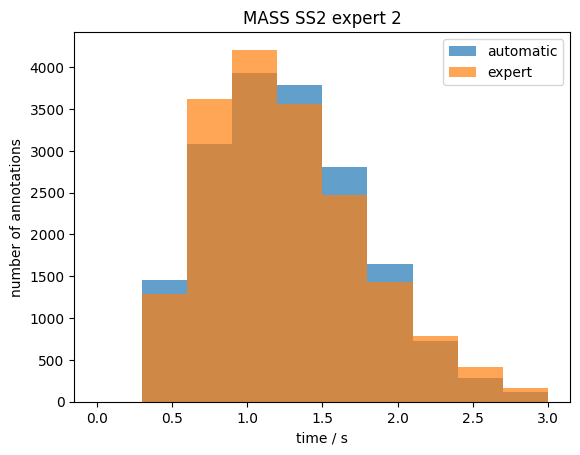

In [207]:
plt.hist(allTablesOut[allTablesOut.tp].durationOut,range=[0,3],alpha=0.7,label="automatic")
plt.hist(allTablesOut[allTablesOut.tp].durationGT,range=[0,3],alpha=0.7,label="expert")
plt.legend()
plt.xlabel("time / s")
plt.ylabel("number of annotations")
plt.title("MASS SS2 expert 2")
plt.show()

In [208]:
px.scatter(allTablesOut[allTablesOut.tp],x="durationGT",y="durationOut",trendline="lowess", marginal_y="histogram", marginal_x="histogram")

In [209]:
result=sst.linregress(allTablesOut[allTablesOut.tp].durationGT,allTablesOut[allTablesOut.tp].durationOut)

In [210]:
result

LinregressResult(slope=0.6324151186875137, intercept=0.48496167998641104, rvalue=0.6078855847618999, pvalue=0.0, stderr=0.006169134363496827, intercept_stderr=0.008414848207331202)

In [211]:
result.rvalue**2

0.369524884161317

In [212]:
len(allTablesOut[allTablesOut.tp])/len(allTablesOut)

0.800821722043587

Text(0.5, 1.0, 'MASS SS2 expert 2')

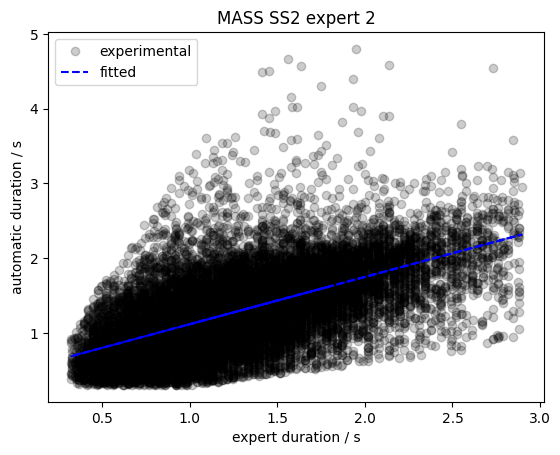

In [213]:
plt.plot(allTablesOut[allTablesOut.tp].durationGT,allTablesOut[allTablesOut.tp].durationOut,linestyle='',marker='o',color='black',alpha=0.2,label='experimental')
plt.plot(allTablesOut[allTablesOut.tp].durationGT, result.intercept + result.slope*np.array(allTablesOut[allTablesOut.tp].durationGT), 'b', label='fitted',linestyle='--')
plt.legend()
plt.xlabel("expert duration / s")
plt.ylabel("automatic duration / s")
plt.title("MASS SS2 expert 2")



### Correlation of number of detections

In [214]:
detectionNumber=list(map(lambda x: len(x),allDetections))
annotationNumber=list(map(lambda x: len(x),allAnnotations))

In [215]:
res=sst.linregress(annotationNumber,detectionNumber)
print(res)

print(np.mean(np.array(detectionDensity) - np.array(annotationDensity)))

LinregressResult(slope=0.8724245666216741, intercept=236.4504624270146, rvalue=0.8452674846470912, pvalue=7.249848551119837e-05, stderr=0.15296163056222895, intercept_stderr=231.41397539453)
31.429975592359543


In [216]:
res.pvalue

7.249848551119837e-05

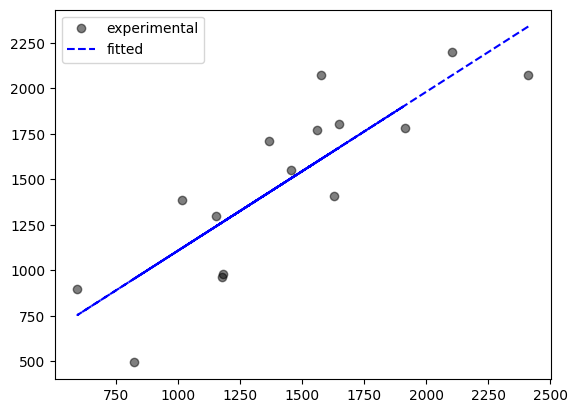

In [217]:
plt.plot(annotationNumber,detectionNumber,linestyle='',marker='o',color='black',alpha=0.5,label='experimental')
plt.plot(annotationNumber, res.intercept + res.slope*np.array(annotationNumber), 'b', linestyle='--', label='fitted')
plt.legend()
plt.show()


### Correlations of density of spindles

In [218]:
signalsMetadata.head()

subjectId           file channel  duration  samplerate  \
0      0001  MASS_0001.pkl  C3-CLE   28956.0         200   
1      0002  MASS_0002.pkl  C3-CLE   35016.0         200   
2      0003  MASS_0003.pkl  C3-CLE   36760.0         200   
3      0004  MASS_0004.pkl  C3-CLE   28004.0         200   
4      0005  MASS_0005.pkl  C3-CLE   31244.0         200   

   isOriginalSamplerate database  
0                 False     MASS  
1                 False     MASS  
2                 False     MASS  
3                 False     MASS  
4                 False     MASS

In [219]:
durations=signalsMetadata.duration

In [220]:
#detectionDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allDetections,durations)))
#annotationDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allAnnotations,durations)))

timesN2=[]
for name, hypnogram in hypnograms.items():
    if name in np.array(experimentModels_N2.test):
        timesN2.append(np.sum(hypnogram==2))
timesN2=np.array(timesN2)
timesN2=timesN2/200

detectionDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allDetections,timesN2)))
annotationDensity=list(map(lambda x: len(x[0])/(x[1]/3600),zip(allAnnotations,timesN2)))

In [221]:
res = sst.linregress(annotationDensity, detectionDensity)
print(res)

print(np.mean(np.array(detectionDensity) - np.array(annotationDensity)))

LinregressResult(slope=0.8085570300201338, intercept=82.2595862907146, rvalue=0.7867909549705937, pvalue=0.0005012212774647677, stderr=0.1759216573565595, intercept_stderr=65.3644355889515)
13.831264193647561


In [222]:
res.rvalue**2

0.6190400068235388

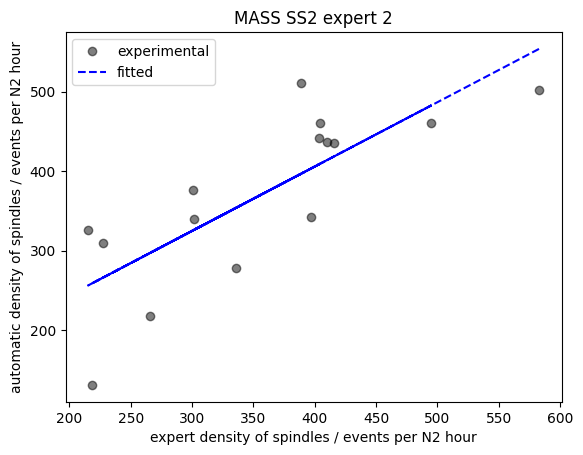

In [223]:
plt.plot(annotationDensity,detectionDensity,linestyle='',marker='o',color='black',alpha=0.5,label='experimental')
plt.plot(annotationDensity, res.intercept + res.slope*np.array(annotationDensity), 'b', linestyle='--', label='fitted')
plt.legend()
plt.title("MASS SS2 expert 2")
plt.xlabel("expert density of spindles / events per N2 hour")
plt.ylabel("automatic density of spindles / events per N2 hour")
plt.show()



In [224]:
allTablesOut[allTablesOut.tp]

indexGT       iou type  indexOut    tp     fp  durationGT  durationOut  \
0          1  0.924157  out         0  True  False       1.780        1.645   
3          4  0.626761  out         3  True  False       0.445        0.710   
4          5  0.598566  out         4  True  False       0.835        1.395   
5          6  0.724138  out         5  True  False       0.945        1.305   
6          7  0.591304  out         6  True  False       0.680        1.150   
...      ...       ...  ...       ...   ...    ...         ...          ...   
1379    1011  0.597938  out      1379  True  False       0.800        0.750   
1380    1012  0.673684  out      1380  True  False       0.475        0.320   
1381    1013  0.877119  out      1381  True  False       1.035        1.180   
1382    1014  0.785714  out      1382  True  False       0.890        0.735   
1383    1015  0.705000  out      1383  True  False       0.980        0.725   

     subjectId  
0         0001  
3         0001  
4         0001  
5         0001  
6         0001  
...        ...  
1379      0019  
1380      0019  
1381      0019  
1382      0019  
1383      0019  

[17932 rows x 9 columns]